In [1]:
import ctypes
import numpy as np
from scipy.interpolate import CubicSpline

def get_trajectory(peak, stride, phase, stance=0.15):
    """
    Foot and center of mass trajectory generator

    The center of mass trajectory is a line q(t) = (x(t), 0, z). 

    The foot trajectories are periodic 3 point cubic splines in z(t),
    lines in x(t), and constant in y => q(t) = (x(t), y, z(t))

    Left and right foot trajectories are offset in time by "phase" timesteps.
    """
    # TODO: figure out formula for how com_vel relates to foot trajectories...
    # is SLIP model necessary?
    com_vel = 0.02 

    t = np.arange(phase)

    m = stride / phase

    ts = np.array([0, phase / 2, phase - 1])
    zs = np.array([0, peak, 0])
    spline = CubicSpline(ts, zs)

    x = m * t
    z = spline(t)

    # left foot steps first
    x_l = np.concatenate((x, np.ones(phase) * x[-1]))
    y_l = np.ones(phase * 2) * -stance
    z_l = np.concatenate((z, np.zeros(phase)))

    # then right foot
    x_r = np.concatenate((np.ones(phase) * x[0] + stride / 2, x + stride / 2))
    y_r = np.ones(phase * 2) * stance
    z_r = np.concatenate((np.zeros(phase), z))

    x_com = np.cumsum(np.ones(phase * 2) * com_vel)
    y_com = np.zeros(phase * 2)
    z_com = np.ones(phase * 2) * 1


    return np.column_stack([x_l, y_l, z_l, 
                       x_r, y_r, z_r, 
                       x_com, y_com, z_com])



In [2]:
traj = get_trajectory(0.2, 0.0, 14)

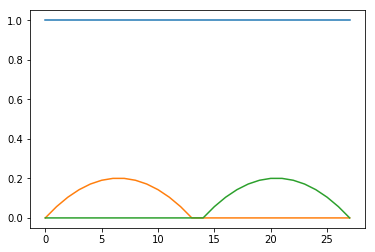

In [3]:
%matplotlib inline

from matplotlib import pyplot as plt

plt.plot(traj[:, 8])
plt.plot(traj[:, 2])
plt.plot(traj[:, 5])

In [4]:
print(traj[0:6, 4][[0, 2]])

[0.15 0.15]


In [5]:
np.set_printoptions(precision=3, suppress=True)
print(traj)

[[ 0.    -0.15   0.     0.     0.15   0.     0.02   0.     1.   ]
 [ 0.    -0.15   0.057  0.     0.15   0.     0.04   0.     1.   ]
 [ 0.    -0.15   0.105  0.     0.15   0.     0.06   0.     1.   ]
 [ 0.    -0.15   0.143  0.     0.15   0.     0.08   0.     1.   ]
 [ 0.    -0.15   0.171  0.     0.15   0.     0.1    0.     1.   ]
 [ 0.    -0.15   0.19   0.     0.15   0.     0.12   0.     1.   ]
 [ 0.    -0.15   0.2    0.     0.15   0.     0.14   0.     1.   ]
 [ 0.    -0.15   0.2    0.     0.15   0.     0.16   0.     1.   ]
 [ 0.    -0.15   0.19   0.     0.15   0.     0.18   0.     1.   ]
 [ 0.    -0.15   0.171  0.     0.15   0.     0.2    0.     1.   ]
 [ 0.    -0.15   0.143  0.     0.15   0.     0.22   0.     1.   ]
 [ 0.    -0.15   0.105  0.     0.15   0.     0.24   0.     1.   ]
 [ 0.    -0.15   0.057  0.     0.15   0.     0.26   0.     1.   ]
 [ 0.    -0.15   0.     0.     0.15   0.     0.28   0.     1.   ]
 [ 0.    -0.15   0.     0.     0.15   0.     0.3    0.     1.   ]
 [ 0.    -